# Scaling of Avalanche Area and Total Number of Topplings with Initial Seed Density in a Sandpile Model

The aim of this project is to investigate the relationship between total toppled area, total number of topplings and the initial number of 'seeds'. We define a 'seed' as a site which has a value equal to 4 (which is the critical threshold). 
\
\
The model used is a variant of the sandpile model wherein the grid is first randomly filled with values 0 to 3. Some of these sites are then chosen at random and are assigned the value 4.
\
The grid is then iteratively relaxed until all the sites are below the threshold value.


**Note: To access the web version of this document, please click [here](https://argemenon.github.io/Modelling_Complex_Systems/Term-1/TERM_I_MS23178.html)**

## Part A: The Model

In [220]:
# Importing the libraries that we will need for the sandpile simulation and visualization

import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm

cmap = ListedColormap([
    "#2c3e50",  # 0 — dark
    "#3498db",  # 1 — blue
    "#2ecc71",  # 2 — green
    "#f1c40f",  # 3 — yellow (near critical)
    "#e74c3c"   # 4+ — red (toppling)
])

### Defining Functions

The toppling function is the bulk of the brain of the model. This dictates how sites change when it's value is greater than the critical value.
\
\
The _'relax'_ function takes a grid as its input and then relaxes the grid iteratively till all the sites have a value less than the critical value. It also returns the total number of iterations _'n'_ till equillibrium and a separate array _'grid_change'_ that logs the sites which have changed in value.

In [179]:
def relax(grid):
    q = deque()

    grid_size = grid.shape[0]

    grid_change = np.zeros_like(grid, dtype=int)

    # We start by finding all unstable sites
    unstable = np.argwhere(grid >= 4)
    for i, j in unstable:
        q.append((i, j))

    n = 0 # Will be used to count the number of topplings

    while q:
        i, j = q.popleft()

        if grid[i, j] < 4:
            continue

        grid[i, j] -= 4
        grid_change[i, j] = 1 # Note that this site has toppled

        # Distribute grains to neighbors
        for ni, nj in [(i+1,j),(i-1,j),(i,j+1),(i,j-1)]:
            if 0 <= ni < grid_size and 0 <= nj < grid_size:
                grid[ni, nj] += 1
                if grid[ni, nj] >= 4: # We check if the neighbor becomes unstable, if so we add it to the queue
                    q.append((ni, nj))

        n += 1

    return n, grid_change


The plotting function is used to visualize the grid.
\
\
The _'plot_grids'_ function takes two grids as it's inputs and plots them. The function is designed such that the first input is the final _'relaxed'_ grid and the second input is the grid which logs changes.

In [170]:
def plot_grids(grid1, grid2):

    fig, axes = plt.subplots(
        1, 2,
        figsize=(12, 4),
        gridspec_kw={'width_ratios': [1, 1]}
    )

    
    im1 = axes[0].imshow(grid1, cmap=cmap, origin='lower', vmin=0, vmax=4)
    axes[0].set_title("relaxed grid")
    axes[0].set_aspect('equal')
    axes[0].axis('off')

    divider1 = make_axes_locatable(axes[0])
    cax1 = divider1.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im1, cax=cax1, ticks=[0,1,2,3,4])

    
    im2 = axes[1].imshow(grid2, cmap=cmap, origin='lower', vmin=0, vmax=4)
    axes[1].set_title("collapsed area")
    axes[1].set_aspect('equal')
    axes[1].axis('off')

    divider2 = make_axes_locatable(axes[1])
    cax2 = divider2.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im2, cax=cax2, ticks=[0,1,2,3,4])

    plt.tight_layout()
    plt.show()


We now define a function to populate an empty grid.
\
\
The _'populate'_ function has two input parameters:

1. x: a parameter between 0 to 1 which dictates the fraction of sites in grid which will be seeds.
2. array: the grid we wish to populate.

The function also returns the total number of seeds in the grid.

In [143]:
def populate(x, array):
    N = array.size
    n4 = int(x * N)

    flat = array.ravel()
    flat[:] = np.random.choice([0,1,2,3], size=N)

    idx = np.random.permutation(N)[:n4]
    flat[idx] = 4

    return n4

#### Example

We now demosnstrate that the code works well and then visualize the results

(-0.5, 9.5, -0.5, 9.5)

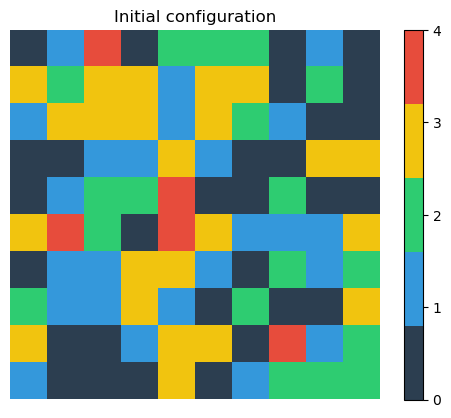

In [182]:
GRID_SIZE = 10

grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

populate(0.05, grid)

plt.imshow(grid, cmap=cmap, origin='lower', vmin=0, vmax=4)
plt.colorbar(ticks=[0,1,2,3,4])
plt.title("Initial configuration")
plt.axis('off')

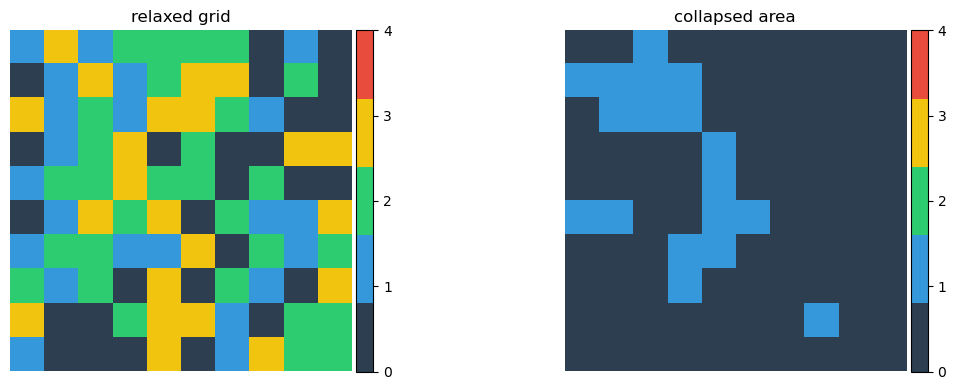

In [183]:
n, grid_change = relax(grid)
plot_grids(grid, grid_change)

Remarks: Notice that the relaxed grid does not have any sites with values equal to 4. 
\
\
The sites with value 1 in 'collapsed area' plot are the sites which have toppled atleast once.

## Part B: Data Collection

To get ample data, we vary the number of seeds in the grid from 0 to 35%. We record the total area that changed and the total number of iterations it took to reach equillibrium states. Following this, we average out this data by running the simulation multiple times for each value of x (parameter which dictates the number of seeds), and calculate the standard deviations.
\
\
To see if the size of grid has any effect on the quantities of interest, we repeat the above method for different grid sizes.
\
\
The number of seeds was not increased beyond 35% as it was noticed that almost all the sites topple after this point.

In [ ]:
xs = np.linspace(0.0, 0.35, 50) # total 50 x values between 0 and 0.35
num_trials = 10   # number of trials for each x value
grids = [50, 75, 100, 125]

mean_area_grids = {i: [] for i in grids}
mean_topplings_grids = {i: [] for i in grids}
std_area_grids = {i: [] for i in grids}
std_topplings_grids = {i: [] for i in grids}

We take a total of 50 different values of x between 0 and 0.35, we then repeat the simulation for each value of x 10 times. This is repeated for grid lengths of 50, 75, 100 and 125.

In [185]:
for grid_size in tqdm(grids):
    for x in xs:
        areas = []
        topplings = []

        for _ in range(num_trials):
            grid = np.zeros((grid_size, grid_size), dtype=int)
            populate(x, grid)

            n, grid_change = relax(grid)

            area = np.sum(grid_change)
            areas.append(area)
            topplings.append(n)

        mean_area_grids[grid_size].append(np.mean(areas))
        mean_topplings_grids[grid_size].append(np.mean(topplings))
        std_area_grids[grid_size].append(np.std(areas))
        std_topplings_grids[grid_size].append(np.std(topplings))

100%|██████████| 4/4 [17:50<00:00, 267.69s/it]


In [222]:
# Export Data for Future Reference

data = {"x": xs}

for L in grids:
    data[f"{L}_mean_area"] = mean_area_grids[L]
    data[f"{L}_std_area"] = std_area_grids[L]
    data[f"{L}_mean_topplings"] = mean_topplings_grids[L]
    data[f"{L}_std_topplings"] = std_topplings_grids[L]

df = pd.DataFrame(data)

df.to_csv("sandpile_results.csv", index=False)

## Part C: Data Visualization and Analysis

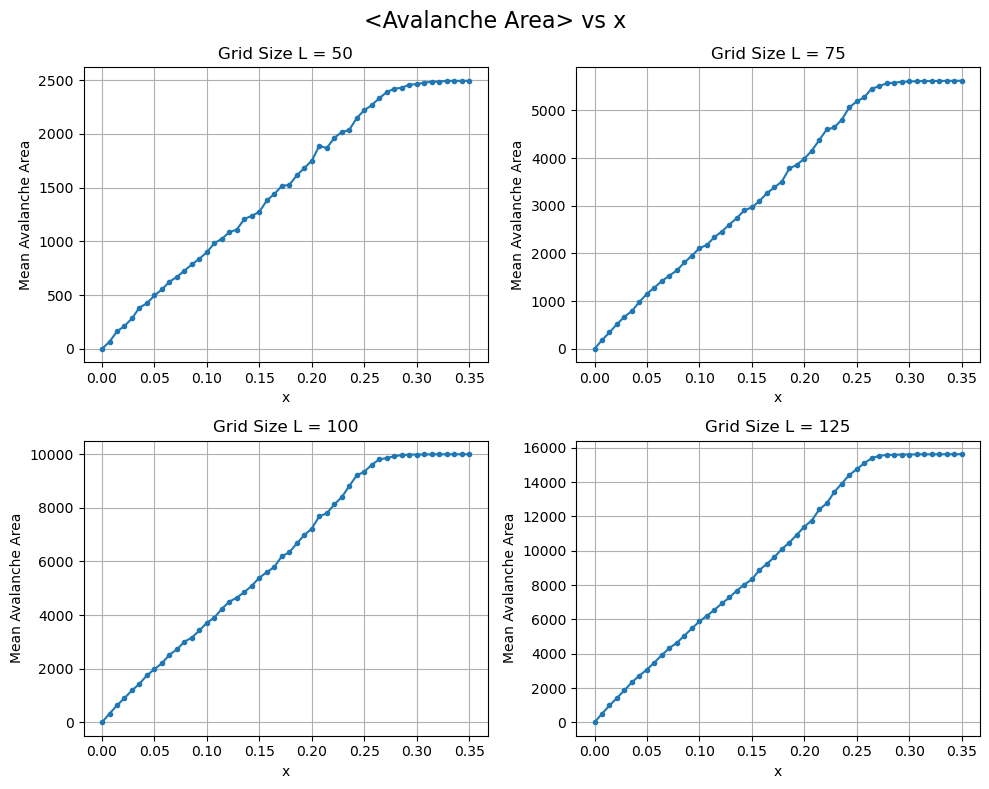

In [186]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for idx, L in enumerate(grids):
    axes[idx].plot(xs, mean_area_grids[L], marker='o', markersize = 3)
    axes[idx].set_title(f"Grid Size L = {L}")
    axes[idx].set_xlabel("x")
    axes[idx].set_ylabel("Mean Avalanche Area")
    axes[idx].grid(True)

fig.suptitle("<Avalanche Area> vs x", fontsize=16)
plt.tight_layout()
plt.show()


Caption: The figure shows the ensemble averaged avalanche area vs the seed parameter x for different system sizes.

Note: As usual, the quantities in angular brackets have been ensemble averaged.

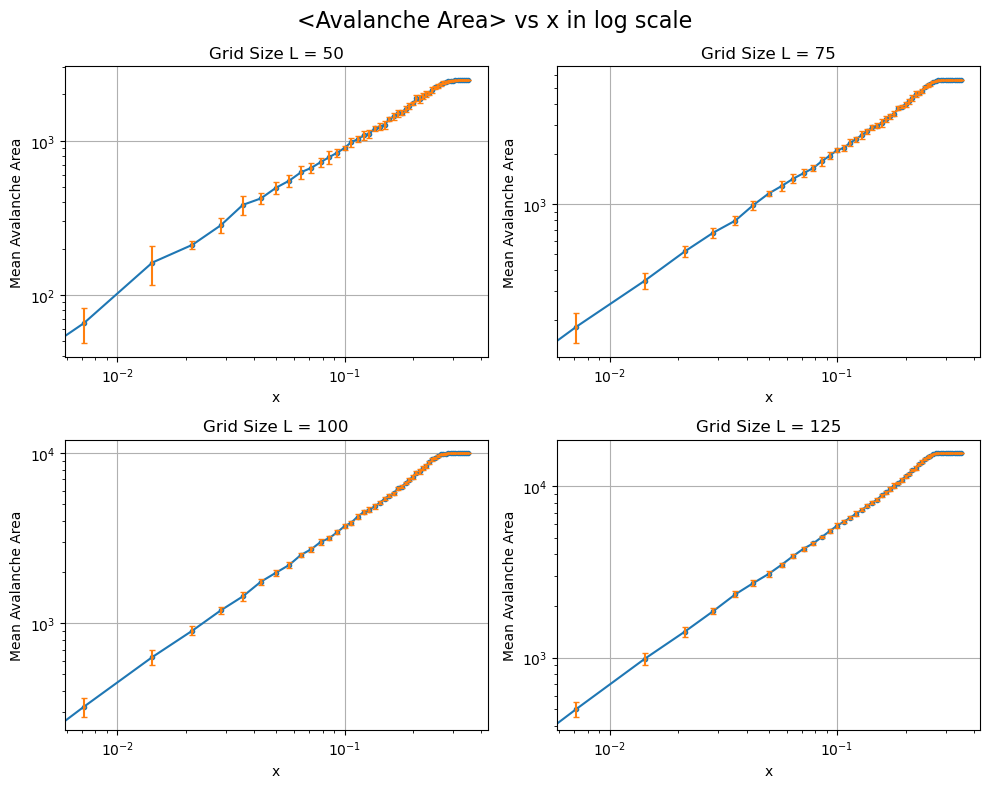

In [187]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for idx, L in enumerate(grids):
    axes[idx].plot(xs, mean_area_grids[L], marker='o', markersize = 3)
    axes[idx].set_title(f"Grid Size L = {L}")
    axes[idx].set_xlabel("x")
    axes[idx].set_ylabel("Mean Avalanche Area")
    axes[idx].grid(True)
    axes[idx].errorbar(xs, mean_area_grids[L], yerr=std_area_grids[L], fmt='o', markersize=1, capsize=2)
    axes[idx].set_xscale('log')
    axes[idx].set_yscale('log')

fig.suptitle("<Avalanche Area> vs x in log scale", fontsize=16)
plt.tight_layout()
plt.show()


Caption: The figure shows ensemble averaged avalanche area vs the seed parameter x on a log log plot for different system sizes.

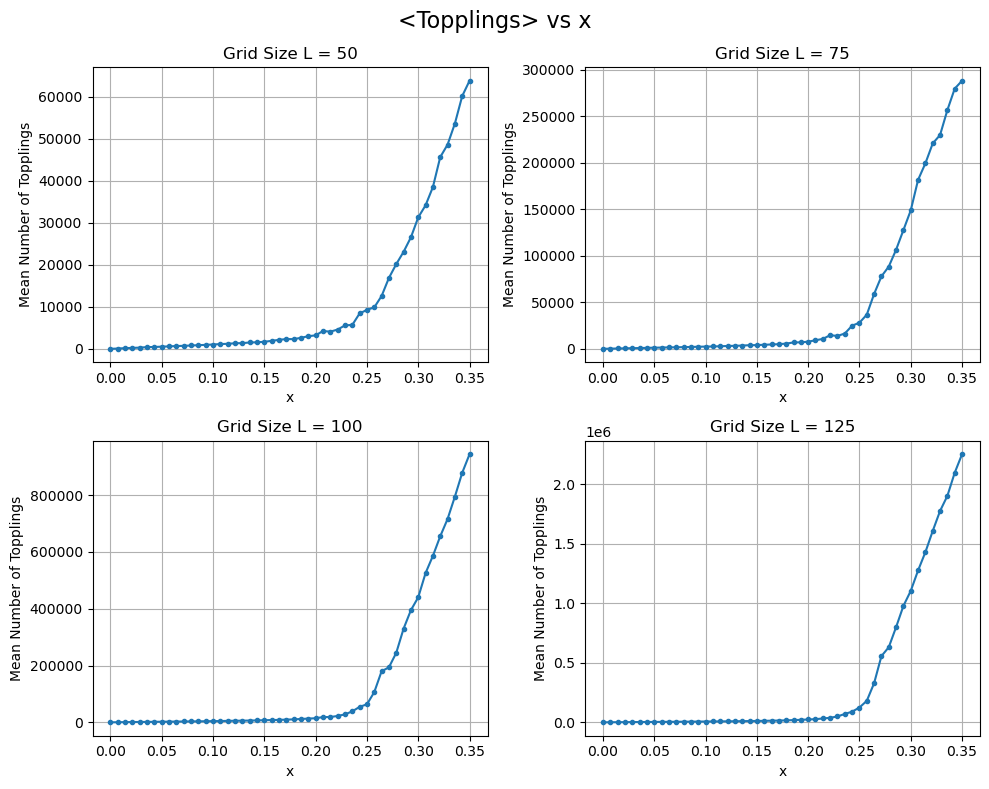

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for idx, L in enumerate(grids):
    axes[idx].plot(xs, mean_topplings_grids[L], marker='o', markersize = 3)
    axes[idx].set_title(f"Grid Size L = {L}")
    axes[idx].set_xlabel("x")
    axes[idx].set_ylabel("Mean Number of Topplings")
    axes[idx].grid(True)

fig.suptitle("<Topplings> vs x", fontsize=16)
plt.tight_layout()
plt.show()

Caption: The figure shows ensemble averaged number of topplings vs the seed parameter x for different system sizes.

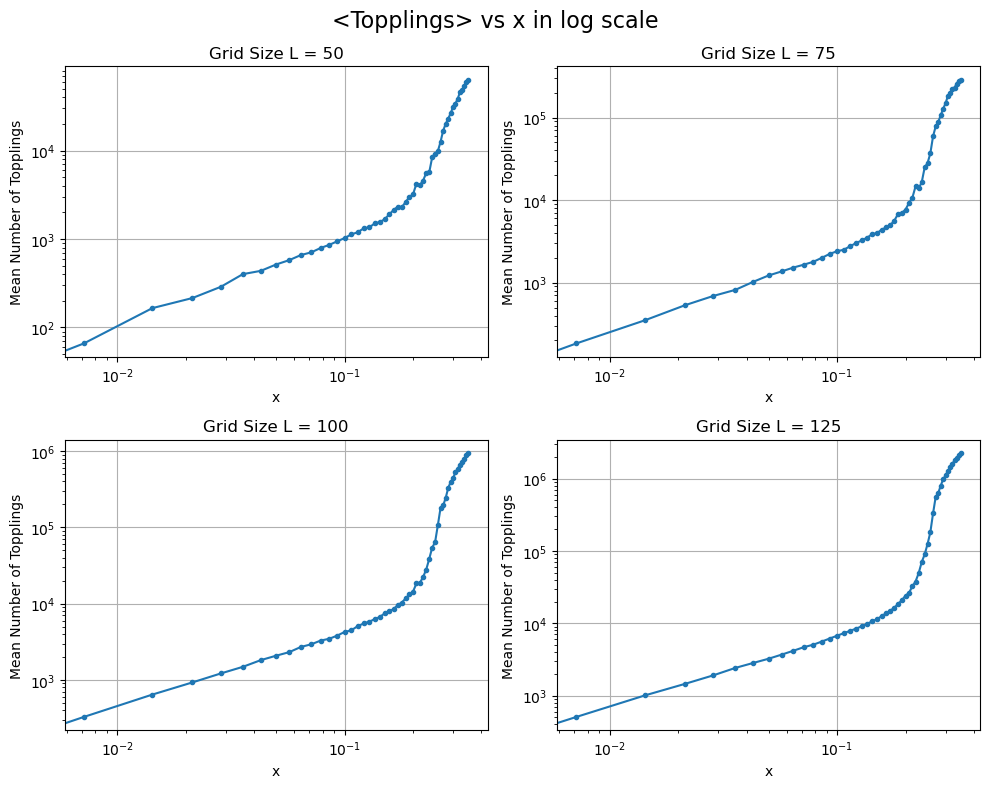

In [193]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for idx, L in enumerate(grids):
    axes[idx].plot(xs, mean_topplings_grids[L], marker='o', markersize = 3)
    axes[idx].set_title(f"Grid Size L = {L}")
    axes[idx].set_xlabel("x")
    axes[idx].set_ylabel("Mean Number of Topplings")
    axes[idx].grid(True)
    axes[idx].set_xscale("log")
    axes[idx].set_yscale("log")

fig.suptitle("<Topplings> vs x in log scale", fontsize=16)
plt.tight_layout()
plt.show()

Caption: The figure shows ensemble averaged number of topplings vs the seed parameter x on a log log plot for different system sizes.

Remark: The behaviour changes abruptly after a point!

### Linear Regression

#### Toppled Area

In [215]:
area_fit_ranges = {
    50:  (0.005, 0.28),
    75:  (0.005, 0.28),
    100: (0.005, 0.28),
    125: (0.005, 0.28)
}

L=50 : slope = 0.944
L=75 : slope = 0.932
L=100 : slope = 0.939
L=125 : slope = 0.940


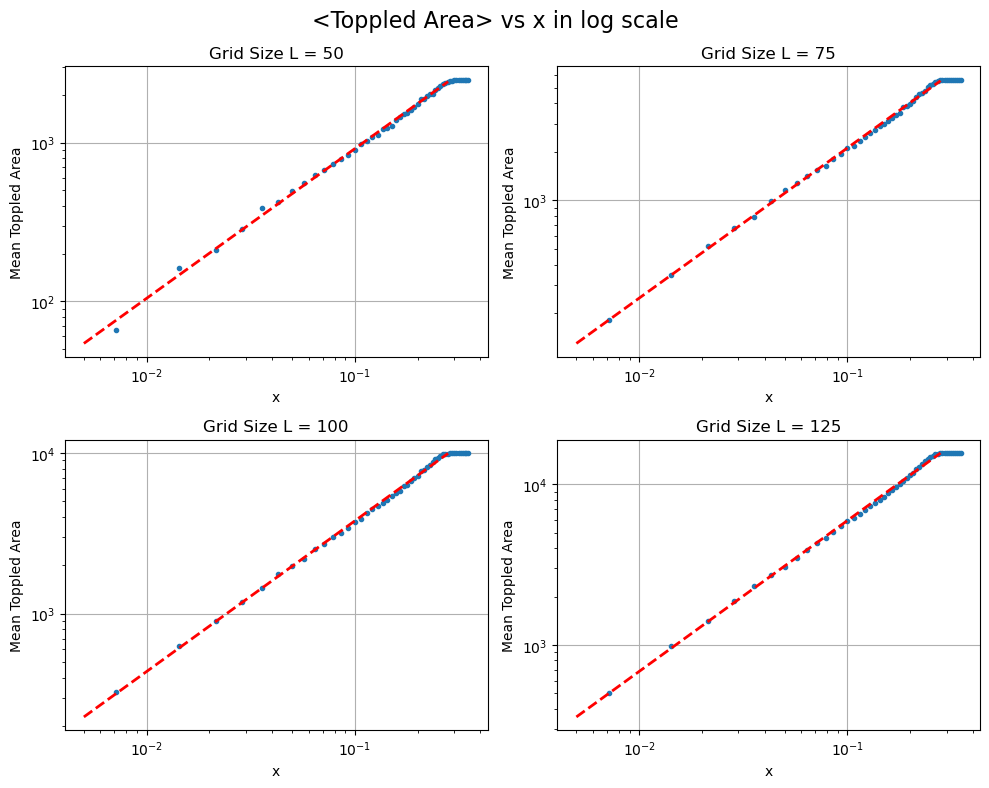

In [219]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for idx, L in enumerate(grids):

    x = np.array(xs)
    y = np.array(mean_area_grids[int(L)])

    axes[idx].plot(x, y, marker='o', markersize=3, linestyle='none')

    
    x_min, x_max = area_fit_ranges[int(L)]
    mask = (x >= x_min) & (x <= x_max) & (y > 0)
    m, c = np.polyfit(np.log10(x[mask]), np.log10(y[mask]), 1)
    x_fit = np.logspace(np.log10(x_min), np.log10(x_max), 200)
    y_fit = 10**c * x_fit**m

    axes[idx].plot(x_fit, y_fit, linestyle='--', linewidth=2, color='red')

    print(f"L={L} : slope = {m:.3f}")
    

    axes[idx].set_title(f"Grid Size L = {L}")
    axes[idx].set_xlabel("x")
    axes[idx].set_ylabel("Mean Toppled Area")
    axes[idx].grid(True)
    axes[idx].set_xscale('log')
    axes[idx].set_yscale('log')
    
    

fig.suptitle("<Toppled Area> vs x in log scale", fontsize=16)
plt.tight_layout()
plt.show()


Caption: The red line is the best fit line for the ensemble averaged mean toppling area vs seed parameter x. The linear regression is repeated for all system sizes.

#### Total Number of Topplings

In [200]:
toppling_fit_ranges = {
    50:  {"p1": (0.01, 0.15),  "p2": (0.2, 0.3)},
    75:  {"p1": (0.01, 0.15),  "p2": (0.21, 0.29)},
    100: {"p1": (0.01, 0.15),  "p2": (0.22, 0.28)},
    125: {"p1": (0.01, 0.15),  "p2": (0.22, 0.28)}
}

L=50 : slope1=1.002, slope2=5.909
L=75 : slope1=1.024, slope2=8.461
L=100 : slope1=1.027, slope2=11.112
L=125 : slope1=1.026, slope2=12.930


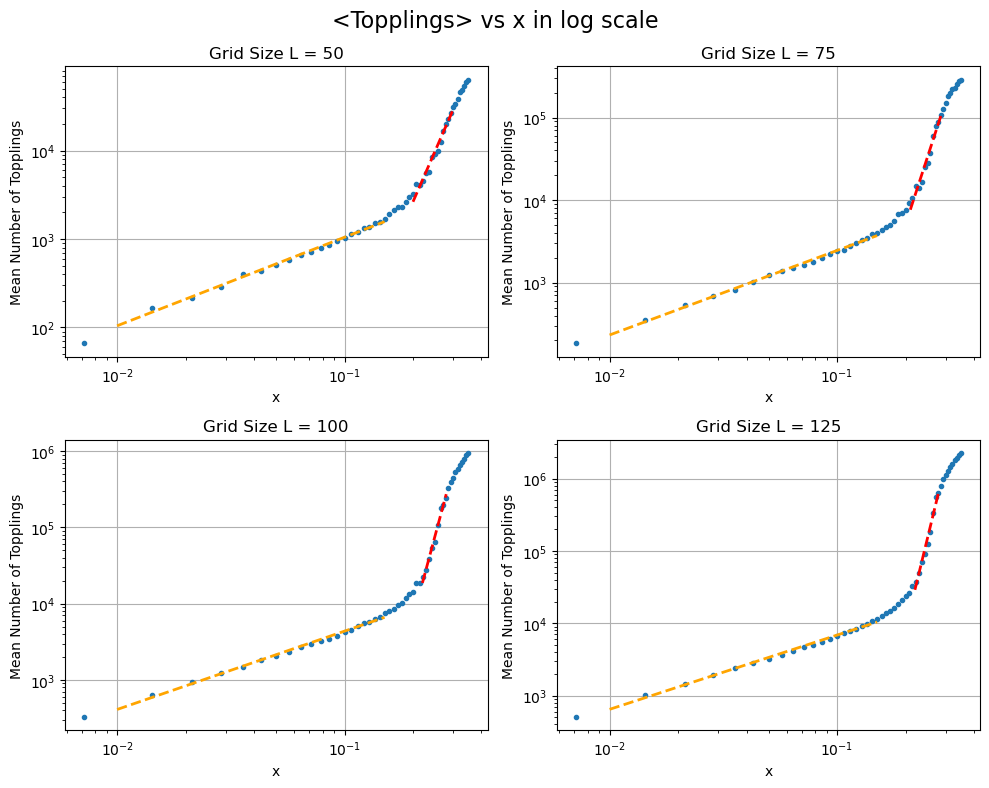

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for idx, L in enumerate(grids):

    x = np.array(xs)
    y = np.array(mean_topplings_grids[L])

    axes[idx].plot(x, y, marker='o', markersize=3, linestyle='none')

    
    x1_min, x1_max = toppling_fit_ranges[L]["p1"]
    x2_min, x2_max = toppling_fit_ranges[L]["p2"]

    
    mask1 = (x >= x1_min) & (x <= x1_max) & (y > 0)
    mask2 = (x >= x2_min) & (x <= x2_max) & (y > 0)

   
    m1, c1 = np.polyfit(np.log10(x[mask1]), np.log10(y[mask1]), 1)
    x_fit1 = np.linspace(x1_min, x1_max, 100)
    y_fit1 = 10**c1 * x_fit1**m1
    axes[idx].plot(x_fit1, y_fit1, linewidth=2, linestyle='--', color='orange')

    
    m2, c2 = np.polyfit(np.log10(x[mask2]), np.log10(y[mask2]), 1)
    x_fit2 = np.linspace(x2_min, x2_max, 100)
    y_fit2 = 10**c2 * x_fit2**m2
    axes[idx].plot(x_fit2, y_fit2, linewidth=2, linestyle='--', color='red')

    axes[idx].set_title(f"Grid Size L = {L}")
    axes[idx].set_xlabel("x")
    axes[idx].set_ylabel("Mean Number of Topplings")
    axes[idx].grid(True)
    axes[idx].set_xscale("log")
    axes[idx].set_yscale("log")

    print(f"L={L} : slope1={m1:.3f}, slope2={m2:.3f}")

fig.suptitle("<Topplings> vs x in log scale", fontsize=16)
plt.tight_layout()
plt.show()


Caption: The red and orange lines are best fit lines in different regimes for the ensemble averaged number of topplings vs the seed parameter x for different system sizes.

## Part D: Observations

### Toppled Area and x:

After performing linear regression on the log-log plots, we may now infer the nature of growth of different quantities.
\
\
We start by analysing the relationship between total toppled area and our seed parameter x. We represent the grid length by the variable L:
+ L=50 : slope = 0.944
+ L=75 : slope = 0.932
+ L=100 : slope = 0.939
+ L=125 : slope = 0.940

Let A be the total toppled area. Then we see that the relationship between A and x is as follows:
+ L=50 : A ~ x^0.944
+ L=75 : A ~ x^0.932
+ L=100 : A ~ x^0.939
+ L=125 : A ~ x^0.940


This suggests that there is approximately a linear relationship between the total toppled area and the seed parameter x. This relationship seems to be independent of the size of the grid.
\
\
However, it should be noted that this linear growth is only upto a point (x ~ 0.28), after which the toppled area plateaus as almost all of the sites have toppled.

### Total Number of Topplings and x:

This case is very intersting as there is a sudden change in dynamics at around x = 0.15!
\
\
We first note the slopes of the two phases in log-log plot in each case:
+ L=50 : slope1=1.002, slope2=5.909
+ L=75 : slope1=1.024, slope2=8.461
+ L=100 : slope1=1.027, slope2=11.112
+ L=125 : slope1=1.027, slope2=12.930

Let N represent the total number of topplings till relaxation, then the relationship between x and N are as follows:
+ For L = 50,  **N ~ x^1.002** if  _0.01 < x < 0.15_   and  **N ~ x^5.909** if _0.2 < x < 0.3_
+ For L = 75,  **N ~ x^1.024** if  _0.01 < x < 0.15_   and  **N ~ x^8.461** if _0.21 < x < 0.29_
+ For L = 100,  **N ~ x^1.027** if  _0.01 < x < 0.15_   and  **N ~ x^11.112** if _0.22 < x < 0.28_
+ For L = 125,  **N ~ x^1.027** if  _0.01 < x < 0.15_   and  **N ~ x^12.930** if _0.22 < x < 0.28_


Thus, we may infer that the total number of topplings increases approximately linearly with the 'seed' parameter up to about x ~ 0.15. Beyond this point, the relationship follows a power law and the total number of topplings required increases tremendously!
\
\
We also note that unlike in the case of total toppled area, in this case the dynamics is dependent on the grid size! The power law has a larger exponet for larger grids.

## Conclusion

In this study, we investigated the dependence of avalanche area (A) and the total number of topplings (N) on the fraction of sites (x) which are initially seeds. We find that the avalanche area scales approximately linearly with x, furthermore, this scaling is independent of the grid size. In the case of total number of topplings however, we find that the scaling behavior has two different regimes. Initially, N scales approximately linearly with x. But, beyond a certian critical point (x ~ 0.15), the scaling behavior transitions into a power law, where the number of topplings increases rapidly. We also observe that the exponent of the power law grows with system size. 

PS: [Here](https://argemenon.github.io/Modelling_Complex_Systems/Term-1/sandpile.mp4) is a link to an animation i made that shows the algorithm in action on a 100x100 grid! To see python code for this animation, please visit my [github repository](https://github.com/Argemenon/Modelling_Complex_Systems.git)

